## 🧠 Customer-Behavior-MySQL2Hive Visualization  

In [159]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [160]:
# Display Setting
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
sns.set_palette("magma")

In [161]:
df=pd.read_csv("E-commerce Customer Behavior.csv")
print("Data Loaded Successfully!")
print("\nShape of DataSet:",df.shape)

Data Loaded Successfully!

Shape of DataSet: (350, 11)


In [162]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [163]:
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


#### Q1: Total Customers

In [164]:
total_customers = df['Customer ID'].nunique()
print("Total Customers:", total_customers)


Total Customers: 350


#### Q2. Average Total Spend

In [165]:
avg_spend = df['Total Spend'].mean()
print("Average Total Spend:", round(avg_spend, 2))

Average Total Spend: 845.38


#### Q4. City with Highest Average Spend

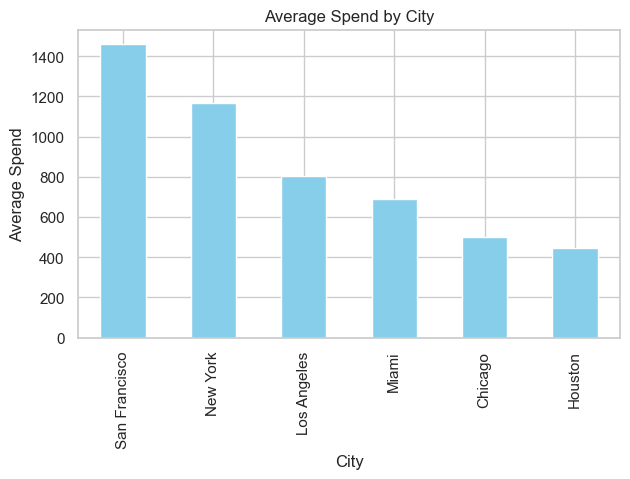

In [166]:
city_spend = df.groupby('City')['Total Spend'].mean().sort_values(ascending=False)
city_spend.plot(kind='bar', color='skyblue', figsize=(7,4))
plt.title("Average Spend by City")
plt.xlabel("City")
plt.ylabel("Average Spend")
plt.show()


#### Q4. Customers per Membership Type

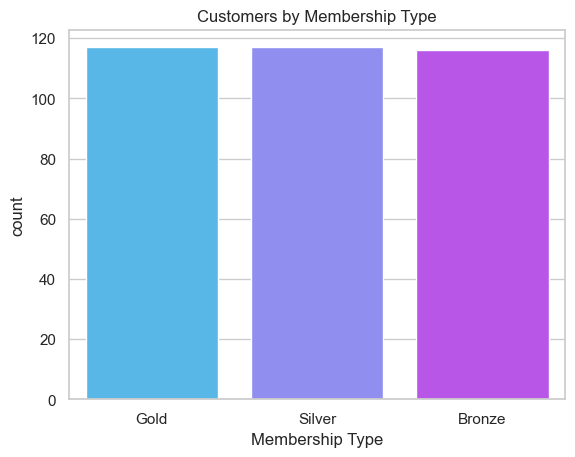

In [167]:
# sns.countplot(data=df, x='Membership Type', palette='cool')
sns.countplot(data=df, x='Membership Type', hue='Membership Type', palette='cool', legend=False)
print()
plt.title("Customers by Membership Type")
plt.show()


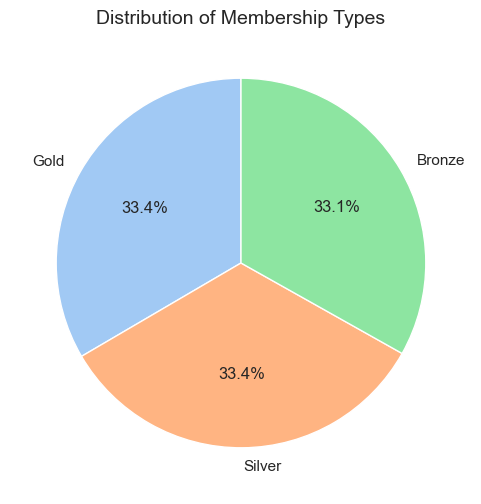

In [184]:
membership_counts = df['Membership Type'].value_counts()

# Create Pie Chart
colors = sns.color_palette("pastel")[0:len(membership_counts)]
plt.figure(figsize=(6,6))
plt.pie(membership_counts, 
        labels=membership_counts.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=90)
plt.title("Distribution of Membership Types", fontsize=14)
plt.show()

#### Q5. Satisfaction Level Distribution

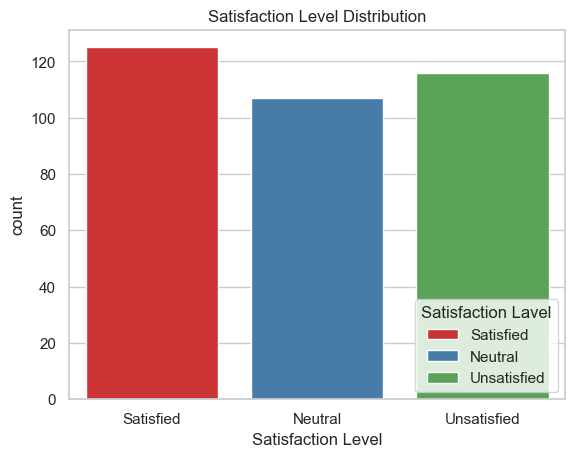

In [186]:
sns.countplot(data=df,
              x='Satisfaction Level',
              hue='Satisfaction Level', 
              palette='Set1',
              legend=True)
plt.title("Satisfaction Level Distribution")
plt.legend(title='Satisfaction Lavel', loc='lower right')
plt.show()


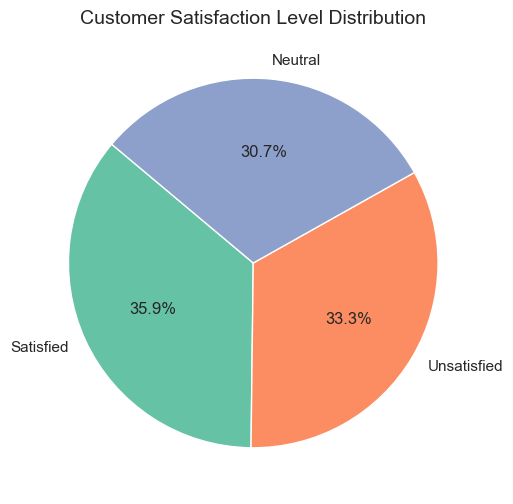

In [182]:
satisfaction_counts = df['Satisfaction Level'].value_counts()

colors = sns.color_palette("Set2")[0:len(satisfaction_counts)]
plt.figure(figsize=(6,6))
plt.pie(satisfaction_counts,
        labels=satisfaction_counts.index, 
        autopct='%1.1f%%', 
        colors=colors,
        startangle=140)
plt.title("Customer Satisfaction Level Distribution", fontsize=14)
plt.show()


#### Q6. Average Rating by Gender

   Gender  Average Rating
0  Female             3.7
1    Male             4.3


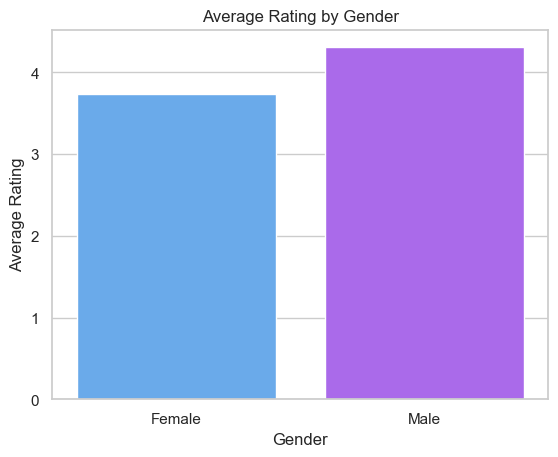

In [171]:
avg_rating = df.groupby('Gender')['Average Rating'].mean().reset_index()
print(round(avg_rating,1))
sns.barplot(data=avg_rating, x='Gender', y='Average Rating', legend=False, hue='Gender', palette='cool')
plt.title("Average Rating by Gender")
plt.show()


#### Q7. Customers Who Used Discount and Were Satisfied

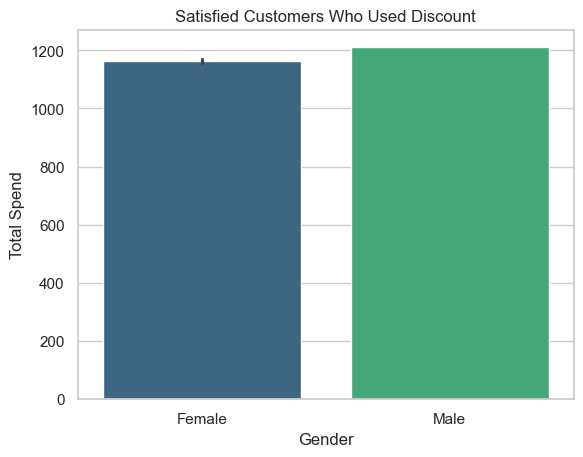

first 5 records


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied
18,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,Satisfied
24,125,Female,31,New York,Gold,1140.6,15,4.6,True,27,Satisfied


In [172]:
discount_satisfied = df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Satisfied')]
sns.barplot(data=discount_satisfied, x='Gender',hue='Gender', y='Total Spend', palette='viridis')
plt.title("Satisfied Customers Who Used Discount")
plt.show()
print('first 5 records')
discount_satisfied.head()

#### Q8. Top 3 Customers by Spend

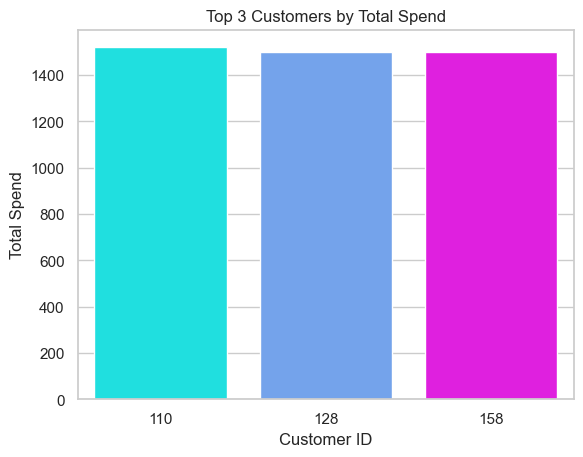

,Customer ID,City,Total Spend
9,110,San Francisco,1520.1
27,128,San Francisco,1500.1
57,158,San Francisco,1500.1


In [173]:
top3 = df.nlargest(3, 'Total Spend')[['Customer ID', 'City', 'Total Spend']]
sns.barplot(data=top3, x='Customer ID', y='Total Spend', hue='Customer ID', palette='cool', legend=False)
plt.title("Top 3 Customers by Total Spend")
# plt.legend(title="City", loc='lower right')
plt.show()
top3

#### Q9. Revenue by Membership Type

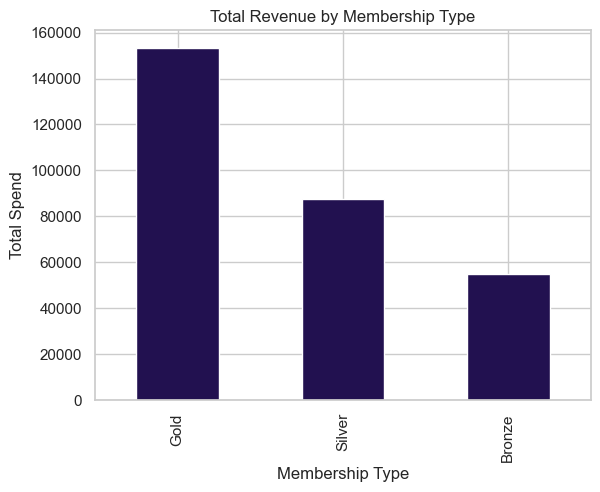

Membership Type
Gold      153403.9
Silver     87566.6
Bronze     54913.1
Name: Total Spend, dtype: float64

In [174]:
membership_revenue = df.groupby('Membership Type')['Total Spend'].sum().sort_values(ascending=False)
membership_revenue.plot(kind='bar')
plt.title("Total Revenue by Membership Type")
plt.ylabel("Total Spend")
plt.show()
membership_revenue

#### Q10. Average Days Since Last Purchase per Satisfaction Level

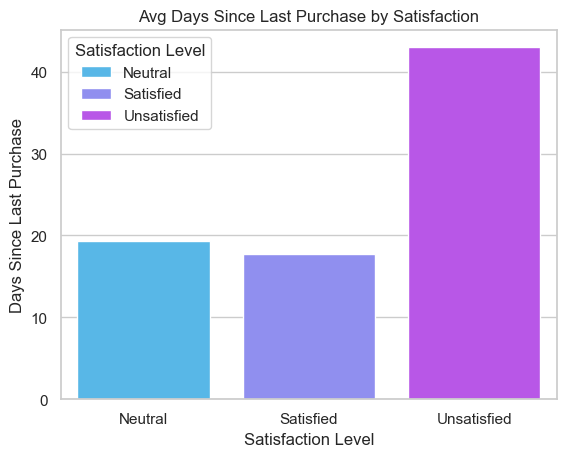

,Satisfaction Level,Days Since Last Purchase
0,Neutral,19.289720
1,Satisfied,17.696000
2,Unsatisfied,42.982759


In [181]:
days_avg = df.groupby('Satisfaction Level')['Days Since Last Purchase'].mean().reset_index()
sns.barplot(
    data=days_avg,
    x='Satisfaction Level',
    hue='Satisfaction Level', 
    legend=True, 
    y='Days Since Last Purchase', 
    palette='cool')
plt.title("Avg Days Since Last Purchase by Satisfaction")
plt.show()
# days_avg['Last Purchase']= round(days_avg['Last Purchase'],2)
days_avg

#### Q11. Which Gender Spends More on Average?

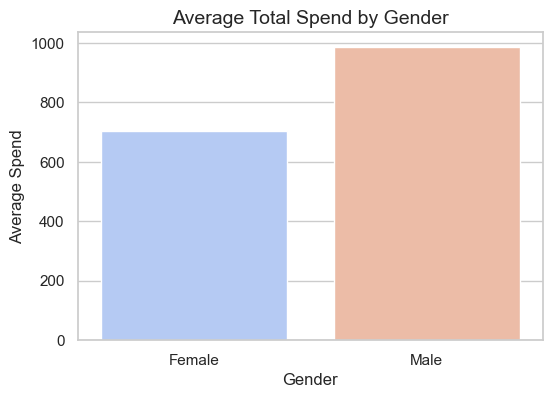

In [176]:
avg_spend_by_gender = df.groupby('Gender')['Total Spend'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_spend_by_gender, x='Gender',hue='Gender', y='Total Spend', palette='coolwarm')
plt.title("Average Total Spend by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Average Spend")
plt.show()


#### Q12. Find Customers Who Purchased More Than 15 Items & Less Than 20 Items.

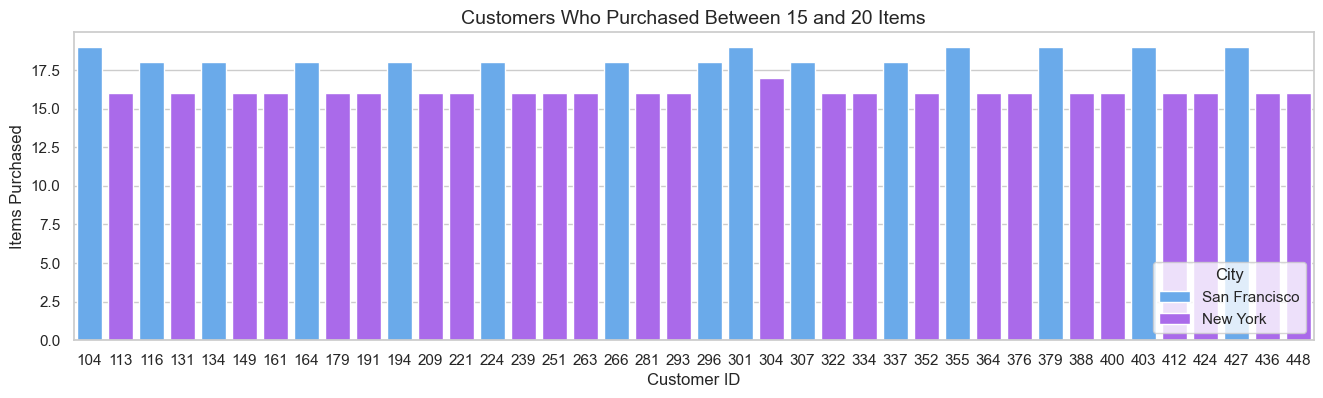

In [177]:
filtered_customers = df[(df['Items Purchased'] > 15) & (df['Items Purchased'] < 20)]

# Visualization
plt.figure(figsize=(16,4))
sns.barplot(data=filtered_customers, x='Customer ID', y='Items Purchased', hue='City', palette='cool')
plt.title("Customers Who Purchased Between 15 and 20 Items", fontsize=14)
plt.xlabel("Customer ID")
plt.ylabel("Items Purchased")
# plt.xticks(rotation=10, ha='right')
plt.legend(title= 'City', loc='lower right')
plt.show()

#### Q13. Find Average Spend per Item for Each Membership Type

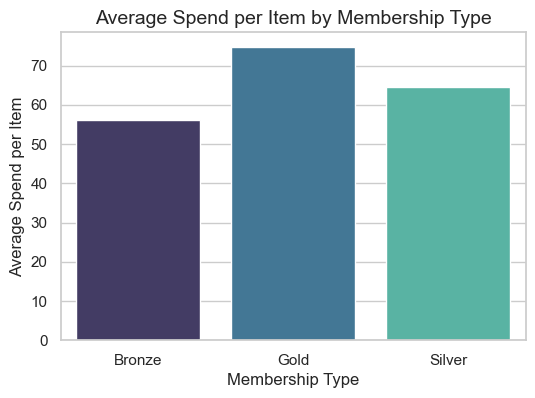

In [178]:
df['Spend per Item'] = df['Total Spend'] / df['Items Purchased']
avg_spend_per_item = df.groupby('Membership Type')['Spend per Item'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_spend_per_item, 
            x='Membership Type',
            hue='Membership Type',
            y='Spend per Item',
            palette='mako')
plt.title("Average Spend per Item by Membership Type", fontsize=14)
plt.xlabel("Membership Type")
plt.ylabel("Average Spend per Item")
plt.show()
